In [111]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import skimage

In [112]:
img = cv.imread('foreground/fg-3.jpg',1)
bg = cv.imread('background/bg-1.jpg',1)

In [113]:
bg = cv.resize(bg, (img.shape[1], img.shape[0]), fx=0, fy=0, interpolation=cv.INTER_CUBIC)

In [114]:
b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]


In [115]:
mask = (g > 90) & (r < g) & (b < g)


In [116]:
mask[mask == True] = 255
mask[mask == False] = 0

In [117]:
mask = ~mask

In [118]:
mask = skimage.morphology.binary_closing(mask, footprint=np.ones((3, 3)))
mask = skimage.morphology.binary_closing(mask, footprint=np.ones((4, 3)))

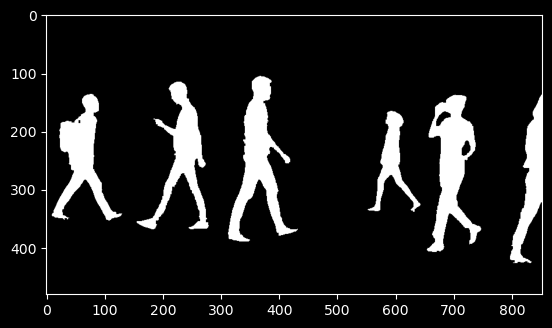

In [119]:
plt.imshow(mask, cmap='gray')

In [120]:
newimg = img.copy()
newimg[mask == 0] = bg[mask == 0]

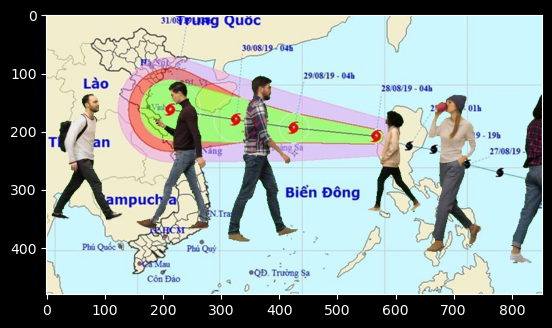

In [121]:
newimg=cv.cvtColor(newimg,cv.COLOR_BGR2RGB)
plt.imshow(newimg)